In [1]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Live.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [15]:
df.isna().sum()


status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [9]:
df = df.drop(columns=['Column1','Column2','Column3','Column4'])

## clustors on object data type

In [17]:
df['status_id'].duplicated().sum()

np.int64(53)

In [19]:
df['status_published'].duplicated().sum()

np.int64(137)

In [21]:
len(df['status_type'].unique())

4

In [22]:
df = df.drop(columns=['status_id','status_published'])

In [24]:
print(df.info() , df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB
None (7050, 10)


In [25]:
X = df # whole data as a feature vector 
Y = df['status_type'] # onto which we want division ,, this is not same as features and target 

## convert categorical variables into integer

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])


In [29]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [30]:
Y = le.fit_transform(Y)

In [34]:
print(X['status_type'].unique())

[3 1 0 2]


### scaling columns

In [35]:
cols = X.columns

In [36]:
print(cols)

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')


In [37]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X = ms.fit_transform(X)

In [38]:
print(X)

[[1.00000000e+00 1.12314225e-01 2.43925679e-02 ... 6.36942675e-03
  1.96078431e-02 0.00000000e+00]
 [3.33333333e-01 3.18471338e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.81953291e-02 1.12434493e-02 ... 6.36942675e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [3.33333333e-01 4.24628450e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.33333333e-01 7.45222930e-02 5.71700810e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.33333333e-01 3.60934183e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [39]:
X = pd.DataFrame(X , columns=[cols])

In [40]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### clustering using K means

In [41]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2 , random_state=40)

kmean.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,40
,copy_x,True
,algorithm,'lloyd'


In [42]:
kmean.cluster_centers_

array([[3.47920277e-01, 3.81089775e-02, 7.68718371e-04, 7.29570753e-04,
        3.75866551e-02, 2.15022066e-03, 2.36743015e-03, 1.17701928e-03,
        3.09239814e-03, 1.41862805e-03],
       [9.86305122e-01, 6.92406932e-02, 2.95016448e-02, 3.24726998e-02,
        6.09613107e-02, 5.20380355e-02, 8.94403623e-03, 1.06165835e-02,
        7.97525255e-03, 7.88559917e-03]])

## inertia for this clusters

#### lesser the inertia , better the model fit

In [43]:
kmean.inertia_

240.06686397262814

In [50]:
labels = kmean.labels_

correct_label = sum(Y==labels)

print(correct_label , 'out of ', Y.size , 'with accuracy' , round(correct_label/float(Y.size),3))

63 out of  7050 with accuracy 0.009


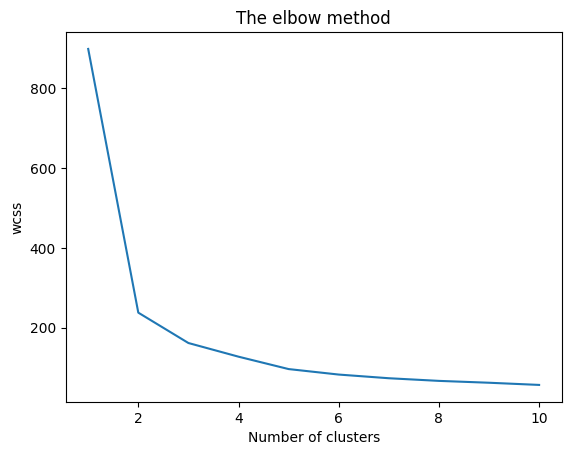

In [51]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=40)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [52]:
kmean1 = KMeans(n_clusters=4 , random_state=40)

kmean1.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,40
,copy_x,True
,algorithm,'lloyd'


In [ ]:
kmean1.inertia_ # for number of clusters = 4

127.31978127042703

In [58]:
labels1 = kmean1.labels_
correct_label1 = sum(Y == labels1)

print(correct_label1,'out of ',Y.size , 'with accuracy' , round(correct_label1/float(Y.size),3)*100,'%')

2147 out of  7050 with accuracy 30.5 %
